##Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HUFS/train.csv', sep = ",")
df.head()

,subject,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
0,3,-0.049573,0.051482,0.061498,0.357428,0.876525,-1.077288,0.951736,-0.303094,-0.133766,5
1,3,-0.085298,0.048648,0.083263,0.337020,0.840771,-1.329607,0.918129,-0.301953,-0.111281,5
2,3,-0.046568,0.057793,0.114970,0.320000,0.909147,-0.788201,0.958863,-0.288855,-0.078756,5
3,3,0.001564,0.068723,0.144465,0.308596,0.773221,-0.313850,1.008886,-0.274002,-0.048346,5
4,3,-0.026644,0.088834,0.188589,0.308176,0.691534,-0.457948,0.982454,-0.250003,-0.003217,5


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HUFS/test.csv', sep = ",")
df2.head()

,subject,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
0,2,0.011653,-0.029399,0.106826,0.437464,0.531349,0.136528,1.041216,-0.269796,0.023780,5
1,2,0.013109,-0.039729,0.152455,0.468264,0.721069,0.097622,1.041803,-0.280025,0.076293,5
2,2,0.011269,-0.052406,0.216846,0.498257,0.520328,0.083556,1.039086,-0.292663,0.147475,5
3,2,0.027831,-0.052106,0.202581,0.479396,0.372625,0.022861,1.054768,-0.292384,0.139906,5
4,2,0.002318,-0.045470,0.176010,0.389894,0.414541,-0.025939,1.028376,-0.285826,0.119934,5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##Data Exploratory

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528256 entries, 0 to 528255
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   subject  528256 non-null  int64  
 1   acc1_x   528256 non-null  float64
 2   acc1_y   528256 non-null  float64
 3   acc1_z   528256 non-null  float64
 4   gyro1_x  528256 non-null  float64
 5   gyro1_y  528256 non-null  float64
 6   gyro1_z  528256 non-null  float64
 7   acc2_x   528256 non-null  float64
 8   acc2_y   528256 non-null  float64
 9   acc2_z   528256 non-null  float64
 10  label    528256 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 44.3 MB


In [ ]:
df.isnull().sum()

subject    0
acc1_x     0
acc1_y     0
acc1_z     0
gyro1_x    0
gyro1_y    0
gyro1_z    0
acc2_x     0
acc2_y     0
acc2_z     0
label      0
dtype: int64

In [ ]:
df['label'].value_counts()

6    107776
4     96768
5     89984
1     88448
2     78848
3     66432
Name: label, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263424 entries, 0 to 263423
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   subject  263424 non-null  int64  
 1   acc1_x   263424 non-null  float64
 2   acc1_y   263424 non-null  float64
 3   acc1_z   263424 non-null  float64
 4   gyro1_x  263424 non-null  float64
 5   gyro1_y  263424 non-null  float64
 6   gyro1_z  263424 non-null  float64
 7   acc2_x   263424 non-null  float64
 8   acc2_y   263424 non-null  float64
 9   acc2_z   263424 non-null  float64
 10  label    263424 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 22.1 MB


In [ ]:
df2.isnull().sum()

subject    0
acc1_x     0
acc1_y     0
acc1_z     0
gyro1_x    0
gyro1_y    0
gyro1_z    0
acc2_x     0
acc2_y     0
acc2_z     0
label      0
dtype: int64

## Data Preprocessing

In [ ]:
df_prep = df.drop(['subject'], axis = 1).copy()
df_prep.head()

,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
0,-0.049573,0.051482,0.061498,0.357428,0.876525,-1.077288,0.951736,-0.303094,-0.133766,5
1,-0.085298,0.048648,0.083263,0.337020,0.840771,-1.329607,0.918129,-0.301953,-0.111281,5
2,-0.046568,0.057793,0.114970,0.320000,0.909147,-0.788201,0.958863,-0.288855,-0.078756,5
3,0.001564,0.068723,0.144465,0.308596,0.773221,-0.313850,1.008886,-0.274002,-0.048346,5
4,-0.026644,0.088834,0.188589,0.308176,0.691534,-0.457948,0.982454,-0.250003,-0.003217,5


In [ ]:
Laying = df_prep[df_prep['label']==6].head(66432).copy()
Sit = df_prep[df_prep['label']==4].head(66432).copy()
Stand = df_prep[df_prep['label']==5].head(66432).copy()
Walking = df_prep[df_prep['label']==1].head(66432).copy()
Upstairs = df_prep[df_prep['label']==2].head(66432).copy()
Downstairs  = df_prep[df_prep['label']==3].copy()

In [ ]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Laying, Sit, Stand, Walking, Upstairs, Downstairs])
balanced_data.shape

(398592, 10)

In [ ]:
balanced_data['label'].value_counts()

6    66432
5    66432
4    66432
3    66432
2    66432
1    66432
Name: label, dtype: int64

In [ ]:
X_train = balanced_data[['acc1_x', 'acc1_y', 'acc1_z', 'gyro1_x',	'gyro1_y'	,'gyro1_z',	'acc2_x',	'acc2_y' ,'acc2_z']]
y_train = balanced_data['label']

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

scaled_X_train = pd.DataFrame(data = X_train, columns = ['acc1_x', 'acc1_y', 'acc1_z', 'gyro1_x',	'gyro1_y'	,'gyro1_z',	'acc2_x',	'acc2_y'	,'acc2_z'])
scaled_X_train['label'] = y_train.values

scaled_X_train.head()

,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
0,-0.438620,-1.369200,1.430501,0.851217,-0.796241,1.578740,-2.019611,1.779761,1.886166,6
1,-0.374741,-0.793655,1.327707,0.901354,-0.765894,1.883280,-1.992723,1.964767,1.862037,6
2,-0.289756,-0.557733,1.237665,0.895613,-0.759431,1.898028,-1.953628,2.037151,1.842076,6
3,-0.254359,-0.481664,1.033454,0.784802,-0.638686,1.935272,-1.942279,2.056371,1.785518,6
4,-0.074221,-0.272800,0.602975,0.678882,-0.567458,1.893044,-1.848870,2.119205,1.656352,6


In [ ]:
df2_prep = df.drop(['subject'], axis = 1).copy()
df2_prep.head()

,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
0,-0.049573,0.051482,0.061498,0.357428,0.876525,-1.077288,0.951736,-0.303094,-0.133766,5
1,-0.085298,0.048648,0.083263,0.337020,0.840771,-1.329607,0.918129,-0.301953,-0.111281,5
2,-0.046568,0.057793,0.114970,0.320000,0.909147,-0.788201,0.958863,-0.288855,-0.078756,5
3,0.001564,0.068723,0.144465,0.308596,0.773221,-0.313850,1.008886,-0.274002,-0.048346,5
4,-0.026644,0.088834,0.188589,0.308176,0.691534,-0.457948,0.982454,-0.250003,-0.003217,5


In [ ]:
X_test = df2_prep[['acc1_x', 'acc1_y', 'acc1_z', 'gyro1_x',	'gyro1_y'	,'gyro1_z',	'acc2_x',	'acc2_y'	,'acc2_z']]
y_test = df2_prep['label']

In [ ]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

scaled_X_test = pd.DataFrame(data = X_test, columns = ['acc1_x', 'acc1_y', 'acc1_z', 'gyro1_x',	'gyro1_y'	,'gyro1_z',	'acc2_x',	'acc2_y'	,'acc2_z'])
scaled_X_test['label'] = y_test.values

scaled_X_test.head()

,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
0,-0.247064,0.414857,0.600621,0.868275,2.300879,-4.168119,0.377900,-0.819421,-0.612107,5
1,-0.427859,0.392073,0.811353,0.818634,2.207115,-5.144488,0.296863,-0.816674,-0.548555,5
2,-0.231854,0.465589,1.118328,0.777233,2.386429,-3.049475,0.395087,-0.785144,-0.456627,5
3,0.011730,0.553450,1.403900,0.749493,2.029968,-1.213935,0.515707,-0.749388,-0.370680,5
4,-0.131027,0.715111,1.831096,0.748473,1.815748,-1.771534,0.451972,-0.691616,-0.243128,5


In [ ]:
X_train = scaled_X_train[['acc1_x', 'acc1_y', 'acc1_z', 'gyro1_x',	'gyro1_y'	,'gyro1_z',	'acc2_x',	'acc2_y' ,'acc2_z']]
y_train = scaled_X_train['label']

In [ ]:
X_test = scaled_X_test[['acc1_x', 'acc1_y', 'acc1_z', 'gyro1_x',	'gyro1_y'	,'gyro1_z',	'acc2_x',	'acc2_y' ,'acc2_z']]
y_test = scaled_X_test['label']

## Train ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

for nh in range (2,11):
  ann=MLPClassifier(hidden_layer_sizes=(nh,),max_iter=10000,random_state=1)
  ann.fit(X_train, y_train)
  acc= 100*ann.score(X_test, y_test)
  f1= f1_score(y_test, ann.predict(X_test), average='micro')
  
  print('Neuron in hidden layer: %g, accuracy %.2f%%, f1-score %.2f'%(nh,acc,f1))

Neuron in hidden layer: 2, accuracy 63.70%, f1-score 0.64
Neuron in hidden layer: 3, accuracy 69.78%, f1-score 0.70
Neuron in hidden layer: 4, accuracy 74.37%, f1-score 0.74
Neuron in hidden layer: 5, accuracy 71.08%, f1-score 0.71
Neuron in hidden layer: 6, accuracy 73.33%, f1-score 0.73
Neuron in hidden layer: 7, accuracy 76.48%, f1-score 0.76
Neuron in hidden layer: 8, accuracy 77.93%, f1-score 0.78
Neuron in hidden layer: 9, accuracy 79.13%, f1-score 0.79
Neuron in hidden layer: 10, accuracy 78.86%, f1-score 0.79


##Frame Preparation 

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
import scipy.stats as stats

2.6.0


In [ ]:
frame_size = 80
hop_size = 40

In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 9

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        acc1_x = df['acc1_x'].values[i: i + frame_size]
        acc1_y = df['acc1_y'].values[i: i + frame_size]
        acc1_z = df['acc1_z'].values[i: i + frame_size]
        gyro1_x = df['gyro1_x'].values[i: i + frame_size]
        gyro1_y = df['gyro1_y'].values[i: i + frame_size]
        gyro1_z = df['gyro1_z'].values[i: i + frame_size]
        acc2_x = df['acc2_x'].values[i: i + frame_size]
        acc2_y = df['acc2_y'].values[i: i + frame_size]
        acc2_z = df['acc2_z'].values[i: i + frame_size]
        
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([acc1_x, acc1_y,	acc1_z,	gyro1_x,	gyro1_y,	gyro1_z,	acc2_x,	acc2_y,	acc2_z])
        labels.append(label)

    
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [ ]:
X_train, y_train = get_frames(scaled_X_train, frame_size, hop_size)
X_train.shape, y_train.shape

((9963, 80, 9), (9963,))

In [ ]:
X_test, y_test = get_frames(scaled_X_test, frame_size, hop_size)
X_test.shape, y_test.shape

((13205, 80, 9), (13205,))

In [ ]:
X_train  = X_train.reshape(9963, 80, 9, 1)
X_test = X_test.reshape(13205, 80, 9, 1)
X_train[0].shape, X_test[0].shape

((80, 9, 1), (80, 9, 1))

In [ ]:
y_subtract = np.ones(y_train.shape)
y_train = y_train- y_subtract
y_subtract = np.ones(y_test.shape)
y_test = y_test - y_subtract
y_train.shape, y_test.shape

((9963,), (13205,))

##Train 2D CNN

In [ ]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
312/312 [==============================] - 17s 52ms/step - loss: 0.5054 - accuracy: 0.7919 - val_loss: 0.2320 - val_accuracy: 0.9159
Epoch 2/10
312/312 [==============================] - 16s 51ms/step - loss: 0.2194 - accuracy: 0.9166 - val_loss: 0.2083 - val_accuracy: 0.9392
Epoch 3/10
312/312 [==============================] - 16s 51ms/step - loss: 0.1566 - accuracy: 0.9426 - val_loss: 0.1923 - val_accuracy: 0.9385
Epoch 4/10
312/312 [==============================] - 16s 51ms/step - loss: 0.1122 - accuracy: 0.9572 - val_loss: 0.1736 - val_accuracy: 0.9434
Epoch 5/10
312/312 [==============================] - 15s 49ms/step - loss: 0.1038 - accuracy: 0.9591 - val_loss: 0.1941 - val_accuracy: 0.9559
Epoch 6/10
312/312 [==============================] - 16s 51ms/step - loss: 0.0887 - accuracy: 0.9663 - val_loss: 0.2081 - val_accuracy: 0.9489
Epoch 7/10
312/312 [==============================] - 16s 52ms/step - loss: 0.0800 - accuracy: 0.9681 - val_loss: 0.2058 - val_accuracy:

In [ ]:
def plot_learningCurve(history, epochs):
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

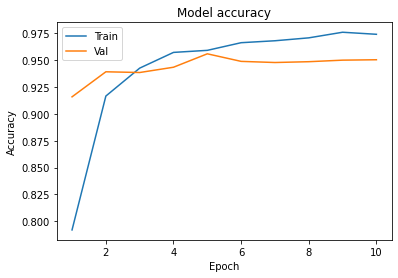

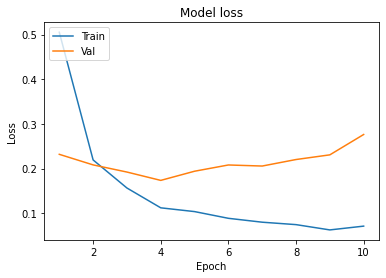

In [ ]:
plot_learningCurve(history, 10)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

In [ ]:
acc = accuracy_score(y_test, y_pred) * 100
f1= f1_score(y_test, y_pred, average='micro')

print('accuracy %.2f%%, f1-score %.2f'%(acc,f1))

accuracy 95.04%, f1-score 0.95
